## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY

https://github.com/cdt59/MPPP


In [133]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt
# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
# import pandas as pd

%run MPPP.py

%matplotlib inline

# time.sleep(20*60)

In [19]:
# Set input path to IMG files and search criteria

pre = ''
suf = 'references'


# Set input and output directories
# directory_input  = 'Z:/Mastcam-Z/agisoft/data'
# directory_output = 'Z:/Mastcam-Z/agisoft/images'

# Set input and output directories
directory_input  = 'C:/Users/cdt59/Desktop/heli/data'
directory_output = 'C:/Users/cdt59/Desktop/heli'

# Set input and output directories
directory_input  = 'C:/Users/cdt59/Desktop/agisoft/data'
directory_output = 'C:/Users/cdt59/Desktop/agisoft/images'

# directory_input  = 'C:/Users/cdt59/Downloads/Mars_2020_sol_681/data'
# directory_output = directory_input
# sol = 6

sol = '7'

pre = 'Z*0_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

# pre = 'N*F_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam'

# pre = '*M_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vce_ecam'

# pre = '*V0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vec'

# pre = 'H*_0'+str(sol)
# suf = 'refs_'+str(sol).zfill(3)+'_heli'


sequ_id = ''

path_input     = directory_input
IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
IMG_paths     += sorted( glob.glob(  directory_input + '/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 

if 'F_0' in pre or 'V' in pre or 'M' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 


IMG_paths = IMG_paths[:]



print( len(IMG_paths), 'images\n')

# IMG_paths = ['C:/Users/cdt59/Desktop/agisoft/data\\NRF_0821_0739830363_020RAD_N0400132NCAM00709_0A0095J02.IMG']

# # remove duplicates in image set

# %run MPPP.py
remove_duplicate_IMGs( IMG_paths )

IMG_paths

826 images

0


['C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703534_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703648_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703667_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703679_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703695_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703707_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703722_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703754_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703771_098RAD_N0390926ZCAM08811_1100LMA01.IMG',
 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_07

984 images

0 ZL0_0786_0736703534_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -333 scale 0.64
 0 ZL0_0786_0736703534_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1799	2258.1678	150.486	27.298	84.184	115.185


1 ZL0_0786_0736703648_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -303 scale 0.64
 1 ZL0_0786_0736703648_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1691	2258.1655	150.4843	30.698	84.705	123.588


2 ZL0_0786_0736703667_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -274 scale 0.64
 2 ZL0_0786_0736703667_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1582	2258.1642	150.4825	34.758	85.214	132.655


3 ZL0_0786_0736703679_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -34 scale 0.64
 3 ZL0_0786_0736703679_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1305	2258.1636	150.4756	-24.904	89.399	88.024


4 ZL0_0786_0736703695_098RAD_N0390926ZCAM08811_1100LMA01.I

42 ZL0_0786_0736704115_098RAD_N0390926ZCAM08811_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -623 scale 0.66
 42 ZL0_0786_0736704115_098RAD_N0390926ZCAM08811_1100LMA03.png	-4625.119	2258.1616	150.4657	-132.278	79.13	-8.987


ZL0_0786_0736704132_098RAD_N0390926ZCAM08811_1100LMA01.IMG failed to process! 

ZL0_0786_0736704132_098RAD_N0390926ZCAM08811_1100LMA02.IMG failed to process! 

45 ZL0_0786_0736704132_098RAD_N0390926ZCAM08811_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -641 scale 0.66
 45 ZL0_0786_0736704132_098RAD_N0390926ZCAM08811_1100LMA03.png	-4625.1074	2258.1651	150.4634	-142.513	78.808	-14.073


ZL0_0786_0736704147_098RAD_N0390926ZCAM08811_1100LMA01.IMG failed to process! 

ZL0_0786_0736704147_098RAD_N0390926ZCAM08811_1100LMA02.IMG failed to process! 

48 ZL0_0786_0736704147_098RAD_N0390926ZCAM08811_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -833 scale 0.66
 48 ZL0_0786_0736704147_098RAD_N0390926ZCAM08811_1100LMA03.png	-4625.1105	2258.1625	150.460

102 ZL0_0786_0736713136_428RAD_N0390926ZCAM08812_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -351 scale 0.91
 102 ZL0_0786_0736713136_428RAD_N0390926ZCAM08812_1100LMA03.png	-4625.0596	2258.2021	150.4619	102.645	83.876	-110.138


ZL0_0786_0736713148_428RAD_N0390926ZCAM08812_1100LMA01.IMG failed to process! 

ZL0_0786_0736713148_428RAD_N0390926ZCAM08812_1100LMA02.IMG failed to process! 

105 ZL0_0786_0736713148_428RAD_N0390926ZCAM08812_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -314 scale 0.91
 105 ZL0_0786_0736713148_428RAD_N0390926ZCAM08812_1100LMA03.png	-4625.0676	2258.1944	150.4639	100.718	84.527	-117.083


ZL0_0786_0736713160_428RAD_N0390926ZCAM08812_1100LMA01.IMG failed to process! 

ZL0_0786_0736713160_428RAD_N0390926ZCAM08812_1100LMA02.IMG failed to process! 

108 ZL0_0786_0736713160_428RAD_N0390926ZCAM08812_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -281 scale 0.91
 108 ZL0_0786_0736713160_428RAD_N0390926ZCAM08812_1100LMA03.png	-4625.0761	2258.187

165 ZL0_0786_0736713412_428RAD_N0390926ZCAM08812_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -600 scale 0.91
 165 ZL0_0786_0736713412_428RAD_N0390926ZCAM08812_1100LMA03.png	-4625.0288	2258.2583	150.4506	110.488	79.537	-72.338


ZL0_0786_0736713425_428RAD_N0390926ZCAM08812_1100LMA01.IMG failed to process! 

ZL0_0786_0736713425_428RAD_N0390926ZCAM08812_1100LMA02.IMG failed to process! 

168 ZL0_0786_0736713425_428RAD_N0390926ZCAM08812_1100LMA03.IMG
sol 786 site 39 drive 926  zenith angle -637 scale 0.91
 168 ZL0_0786_0736713425_428RAD_N0390926ZCAM08812_1100LMA03.png	-4625.0267	2258.2694	150.4493	107.886	78.884	-69.909


169 ZL0_0789_0736980975_113RAD_N0390926ZCAM03648_1100LMA01.IMG
resizing image size (128, 128, 3) by padding = [ left, right, top, bottom ] = [ 416, 1104, 576, 496 ]
sol 789 site 39 drive 926  zenith angle -798 scale 0.92
 169 ZL0_0789_0736980975_113RAD_N0390926ZCAM03648_1100LMA01.png	-4625.1436	2258.1539	150.4673	-113.9	76.082	0.193


170 ZL0_0789_0736981026_113

sol 789 site 39 drive 926  zenith angle -808 scale 0.92
 199 ZL0_0789_0736982303_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2547	2258.3627	150.4803	49.033	75.906	28.654


200 ZL0_0789_0736982319_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -789 scale 0.92
 200 ZL0_0789_0736982319_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2708	2258.3313	150.4857	43.76	76.222	39.686


201 ZL0_0789_0736982334_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -731 scale 0.92
 201 ZL0_0789_0736982334_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2775	2258.2958	150.4901	40.268	77.25	52.444


202 ZL0_0789_0736982349_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -666 scale 0.92
 202 ZL0_0789_0736982349_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2742	2258.2597	150.4929	37.02	78.377	65.414


ZL0_0789_0736982364_113RAD_N0390926ZCAM08808_0340LMA01.IMG failed to process! 

ZL0_0789_0736982364_113RAD_N0390926ZCAM088

237 ZL0_0789_0736982849_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -807 scale 0.91
 237 ZL0_0789_0736982849_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2372	2258.1854	150.4817	-40.704	75.92	31.417


238 ZL0_0789_0736982864_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -988 scale 0.91
 238 ZL0_0789_0736982864_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2626	2258.2145	150.4833	-23.772	72.765	32.129


239 ZL0_0789_0736982879_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1057 scale 0.91
 239 ZL0_0789_0736982879_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2771	2258.2476	150.4847	-6.028	71.555	33.563


240 ZL0_0789_0736982896_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1168 scale 0.91
 240 ZL0_0789_0736982896_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.283	2258.2852	150.4831	7.661	69.613	30.402


241 ZL0_0789_0736982912_113RAD_N0390926ZCAM08808_0340LM

272 ZL0_0789_0736983393_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2655 scale 0.91
 272 ZL0_0789_0736983393_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2657	2258.1919	150.4474	-63.467	43.668	9.39


273 ZL0_0789_0736983409_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2445 scale 0.91
 273 ZL0_0789_0736983409_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2184	2258.1551	150.4435	-90.555	47.326	4.587


274 ZL0_0789_0736983425_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2439 scale 0.91
 274 ZL0_0789_0736983425_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.1616	2258.1405	150.4339	-119.005	47.443	-1.999


275 ZL0_0789_0736983443_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2504 scale 0.91
 275 ZL0_0789_0736983443_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.1039	2258.1506	150.423	-147.291	46.307	-8.465


276 ZL0_0789_0736983461_113RAD_N0390926ZCAM08808_0

307 ZL0_0789_0736984246_020RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -713 scale 0.90
 307 ZL0_0789_0736984246_020RAD_N0390926ZCAM08809_1100LMA01.png	-4625.048	2258.2078	150.4524	160.757	77.552	-40.298


308 ZL0_0789_0736984262_035RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -767 scale 0.90
 308 ZL0_0789_0736984262_035RAD_N0390926ZCAM08809_1100LMA01.png	-4625.0412	2258.2184	150.4505	154.893	76.608	-40.948


309 ZL0_0789_0736984280_035RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -825 scale 0.90
 309 ZL0_0789_0736984280_035RAD_N0390926ZCAM08809_1100LMA01.png	-4625.0356	2258.2287	150.4485	149.661	75.603	-41.023


310 ZL0_0789_0736984293_022RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -885 scale 0.90
 310 ZL0_0789_0736984293_022RAD_N0390926ZCAM08809_1100LMA01.png	-4625.031	2258.2392	150.4466	144.943	74.551	-40.622


311 ZL0_0789_0736984308_025RAD_N0390926ZCAM08809_1

342 ZL0_0789_0736984744_022RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1530 scale 0.90
 342 ZL0_0789_0736984744_022RAD_N0390926ZCAM08809_1100LMA01.png	-4625.0256	2258.2464	150.4349	152.333	63.301	-25.221


343 ZL0_0789_0736984757_020RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1457 scale 0.89
 343 ZL0_0789_0736984757_020RAD_N0390926ZCAM08809_1100LMA01.png	-4625.0303	2258.2331	150.437	158.401	64.564	-25.069


344 ZL0_0789_0736984772_020RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1393 scale 0.89
 344 ZL0_0789_0736984772_020RAD_N0390926ZCAM08809_1100LMA01.png	-4625.0363	2258.2205	150.4392	164.755	65.698	-24.58


345 ZL0_0789_0736984786_020RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1333 scale 0.89
 345 ZL0_0789_0736984786_020RAD_N0390926ZCAM08809_1100LMA01.png	-4625.0432	2258.2092	150.4414	171.048	66.743	-23.808


346 ZL0_0789_0736984799_034RAD_N0390926ZCAM088

sol 792 site 39 drive 926  zenith angle -2626 scale 0.90
 376 ZL0_0792_0737250256_848RAD_N0390926ZCAM03014_048085A01.png	-4625.1952	2258.4154	150.4451	51.19	44.173	1.143


377 ZL0_0792_0737256482_832RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -601 scale 0.76
 377 ZL0_0792_0737256482_832RAD_N0390926ZCAM08817_1100LMA01.png	-4625.026	2258.2761	150.4505	85.696	79.517	-90.472


378 ZL0_0792_0737256530_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -621 scale 0.76
 378 ZL0_0792_0737256530_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.0257	2258.2886	150.4498	78.441	79.157	-92.577


379 ZL0_0792_0737256548_864RAD_N0390926ZCAM08817_1100LMA02.IMG
sol 792 site 39 drive 926  zenith angle -637 scale 0.75
 379 ZL0_0792_0737256548_864RAD_N0390926ZCAM08817_1100LMA02.png	-4625.0264	2258.3001	150.449	76.117	78.885	-89.828


380 ZL0_0792_0737256562_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -649 scale 0.75


411 ZL0_0792_0737256962_831RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -643 scale 0.74
 411 ZL0_0792_0737256962_831RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1367	2258.4134	150.4583	59.427	78.771	-29.327


412 ZL0_0792_0737256974_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -676 scale 0.74
 412 ZL0_0792_0737256974_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1248	2258.4114	150.4562	61.257	78.201	-32.766


413 ZL0_0792_0737256986_888RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -690 scale 0.74
 413 ZL0_0792_0737256986_888RAD_N0390926ZCAM08817_1100LMA01.png	-4625.114	2258.4085	150.4545	62.456	77.956	-36.628


414 ZL0_0792_0737256998_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -701 scale 0.74
 414 ZL0_0792_0737256998_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1034	2258.4046	150.453	63.696	77.774	-40.461


415 ZL0_0792_0737257011_848RAD_N0390926ZCAM08817_1100L

446 ZL0_0792_0737257518_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -71 scale 0.72
 446 ZL0_0792_0737257518_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2137	2258.3957	150.4752	88.449	88.768	31.77


447 ZL0_0792_0737257534_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -88 scale 0.72
 447 ZL0_0792_0737257534_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2035	2258.4013	150.4729	48.218	88.467	-13.604


448 ZL0_0792_0737257553_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -113 scale 0.72
 448 ZL0_0792_0737257553_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1933	2258.4057	150.4708	23.346	88.027	-43.619


449 ZL0_0792_0737257570_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -161 scale 0.72
 449 ZL0_0792_0737257570_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1824	2258.4092	150.4685	14.808	87.198	-57.315


450 ZL0_0792_0737257586_848RAD_N0390926ZCAM08817_1100LMA

478 ZL0_0792_0737258054_863RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -472 scale 0.69
 478 ZL0_0792_0737258054_863RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2408	2258.3743	150.4807	67.904	81.762	31.322


479 ZL0_0792_0737258129_831RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -494 scale 0.69
 479 ZL0_0792_0737258129_831RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2478	2258.366	150.4826	68.227	81.376	36.873


480 ZL0_0792_0737258142_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -421 scale 0.69
 480 ZL0_0792_0737258142_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.255	2258.3547	150.4854	81.506	82.661	54.998


481 ZL0_0792_0737258159_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -439 scale 0.69
 481 ZL0_0792_0737258159_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2603	2258.3447	150.4873	84.077	82.336	62.759


482 ZL0_0792_0737258172_831RAD_N0390926ZCAM08817_1100LMA01

sol 786 site 39 drive 926  zenith angle -288 scale 0.65
 511 ZR0_0786_0736703754_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1931	2258.4071	150.4633	-7.297	84.981	87.471


512 ZR0_0786_0736703771_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -339 scale 0.65
 512 ZR0_0786_0736703771_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1828	2258.4103	150.4612	-6.176	84.08	83.594


513 ZR0_0786_0736703783_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -412 scale 0.65
 513 ZR0_0786_0736703783_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.189	2258.4097	150.4599	-36.827	82.809	53.835


514 ZR0_0786_0736703797_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -357 scale 0.65
 514 ZR0_0786_0736703797_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.1994	2258.406	150.462	-43.491	83.775	52.201


515 ZR0_0786_0736703809_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -313 scale 0.65
 5

546 ZR0_0786_0736704247_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -1083 scale 0.67
 546 ZR0_0786_0736704247_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.218	2258.403	150.4524	-81.294	71.102	15.451


547 ZR0_0786_0736704262_098RAD_N0390926ZCAM08811_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -1048 scale 0.67
 547 ZR0_0786_0736704262_098RAD_N0390926ZCAM08811_1100LMA01.png	-4625.2288	2258.3961	150.4549	-89.582	71.707	12.599


ZR0_0786_0736704275_098RAD_N0390926ZCAM08811_1100LMA01.IMG failed to process! 

549 ZR0_0786_0736704275_098RAD_N0390926ZCAM08811_1100LMA02.IMG
sol 786 site 39 drive 926  zenith angle -1017 scale 0.67
 549 ZR0_0786_0736704275_098RAD_N0390926ZCAM08811_1100LMA02.png	-4625.2386	2258.3884	150.4575	-98.12	72.26	9.449


550 ZR0_0786_0736712376_269RAD_N0390926ZCAM03645_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -213 scale 0.90
 550 ZR0_0786_0736712376_269RAD_N0390926ZCAM03645_1100LMA01.png	-4625.2516	2258.3665	150.473

581 ZR0_0786_0736713412_428RAD_N0390926ZCAM08812_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -559 scale 0.91
 581 ZR0_0786_0736713412_428RAD_N0390926ZCAM08812_1100LMA01.png	-4625.269	2258.2639	150.4913	110.067	80.248	-71.016


582 ZR0_0786_0736713425_428RAD_N0390926ZCAM08812_1100LMA01.IMG
sol 786 site 39 drive 926  zenith angle -596 scale 0.91
 582 ZR0_0786_0736713425_428RAD_N0390926ZCAM08812_1100LMA01.png	-4625.2661	2258.2537	150.4918	107.658	79.598	-68.396


583 ZR0_0789_0736980975_113RAD_N0390926ZCAM03648_1100LMA01.IMG
resizing image size (128, 128, 3) by padding = [ left, right, top, bottom ] = [ 112, 1408, 624, 448 ]
sol 789 site 39 drive 926  zenith angle -784 scale 0.92
 583 ZR0_0789_0736980975_113RAD_N0390926ZCAM03648_1100LMA01.png	-4625.2488	2258.3735	150.464	-111.078	76.315	4.775


584 ZR0_0789_0736981113_113RAD_N0390926ZCAM03648_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -783 scale 0.92
 584 ZR0_0789_0736981113_113RAD_N0390926ZCAM03648_1100LMA01.png	-462

614 ZR0_0789_0736982319_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -869 scale 0.92
 614 ZR0_0789_0736982319_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.0307	2258.3214	150.4454	41.598	74.829	41.877


615 ZR0_0789_0736982334_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -802 scale 0.92
 615 ZR0_0789_0736982334_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.0453	2258.3539	150.4449	36.723	76.001	53.279


616 ZR0_0789_0736982349_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -726 scale 0.92
 616 ZR0_0789_0736982349_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.0683	2258.3813	150.4462	31.954	77.329	64.746


617 ZR0_0789_0736982364_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -671 scale 0.92
 617 ZR0_0789_0736982364_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.0994	2258.4024	150.4481	19.764	78.297	68.833


618 ZR0_0789_0736982381_113RAD_N0390926ZCAM08808_0340LMA

652 ZR0_0789_0736982849_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -865 scale 0.91
 652 ZR0_0789_0736982849_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.1694	2258.4168	150.4476	-40.583	74.912	35.086


653 ZR0_0789_0736982864_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1045 scale 0.91
 653 ZR0_0789_0736982864_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.132	2258.4157	150.4413	-23.711	71.757	35.74


654 ZR0_0789_0736982879_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1120 scale 0.91
 654 ZR0_0789_0736982879_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.0954	2258.403	150.4383	-6.321	70.449	37.005


655 ZR0_0789_0736982896_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -1232 scale 0.91
 655 ZR0_0789_0736982896_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.0638	2258.3802	150.436	7.56	68.504	34.026


656 ZR0_0789_0736982912_113RAD_N0390926ZCAM08808_0340LMA0

688 ZR0_0789_0736983393_113RAD_N0390926ZCAM08808_0340LMA02.IMG
sol 789 site 39 drive 926  zenith angle -2666 scale 0.91
 688 ZR0_0789_0736983393_113RAD_N0390926ZCAM08808_0340LMA02.png	-4625.1885	2258.4198	150.4115	-62.584	43.468	12.606


689 ZR0_0789_0736983409_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2454 scale 0.91
 689 ZR0_0789_0736983409_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2409	2258.3965	150.4234	-89.59	47.179	7.902


690 ZR0_0789_0736983425_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2443 scale 0.91
 690 ZR0_0789_0736983425_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2793	2258.3534	150.4327	-118.021	47.361	1.349


691 ZR0_0789_0736983443_113RAD_N0390926ZCAM08808_0340LMA01.IMG
sol 789 site 39 drive 926  zenith angle -2504 scale 0.91
 691 ZR0_0789_0736983443_113RAD_N0390926ZCAM08808_0340LMA01.png	-4625.2965	2258.2983	150.4408	-146.32	46.301	-5.14


692 ZR0_0789_0736983461_113RAD_N0390926ZCAM08808_03

sol 789 site 39 drive 926  zenith angle -613 scale 0.90
 723 ZR0_0789_0736984234_020RAD_N0390926ZCAM08809_1100LMA01.png	-4625.2763	2258.2977	150.4827	168.108	79.303	-36.157


724 ZR0_0789_0736984246_020RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -668 scale 0.90
 724 ZR0_0789_0736984246_020RAD_N0390926ZCAM08809_1100LMA01.png	-4625.2769	2258.2852	150.4837	161.708	78.338	-37.46


725 ZR0_0789_0736984262_035RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -724 scale 0.90
 725 ZR0_0789_0736984262_035RAD_N0390926ZCAM08809_1100LMA01.png	-4625.2757	2258.2747	150.4849	155.853	77.365	-38.134


726 ZR0_0789_0736984280_035RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -782 scale 0.90
 726 ZR0_0789_0736984280_035RAD_N0390926ZCAM08809_1100LMA01.png	-4625.2739	2258.2632	150.4856	150.547	76.361	-38.284


727 ZR0_0789_0736984293_022RAD_N0390926ZCAM08809_1100LMA01.IMG
sol 789 site 39 drive 926  zenith angle -841 scal

767 ZR0_0789_0736984662_019RAD_N0390926ZCAM08809_1100LMA02.IMG
sol 789 site 39 drive 926  zenith angle -1230 scale 0.90
 767 ZR0_0789_0736984662_019RAD_N0390926ZCAM08809_1100LMA02.png	-4625.2709	2258.2385	150.4804	156.899	68.541	-25.542


ZR0_0789_0736984677_034RAD_N0390926ZCAM08809_1100LMA01.IMG failed to process! 

769 ZR0_0789_0736984677_034RAD_N0390926ZCAM08809_1100LMA02.IMG
sol 789 site 39 drive 926  zenith angle -1293 scale 0.90
 769 ZR0_0789_0736984677_034RAD_N0390926ZCAM08809_1100LMA02.png	-4625.2656	2258.2273	150.4806	151.417	67.429	-25.621


ZR0_0789_0736984692_020RAD_N0390926ZCAM08809_1100LMA01.IMG failed to process! 

771 ZR0_0789_0736984692_020RAD_N0390926ZCAM08809_1100LMA02.IMG
sol 789 site 39 drive 926  zenith angle -1354 scale 0.90
 771 ZR0_0789_0736984692_020RAD_N0390926ZCAM08809_1100LMA02.png	-4625.2593	2258.2165	150.4805	146.108	66.374	-25.503


ZR0_0789_0736984706_020RAD_N0390926ZCAM08809_1100LMA01.IMG failed to process! 

773 ZR0_0789_0736984706_020RAD_N0390926ZCAM

819 ZR0_0789_0736985021_024RAD_N0390926ZCAM08809_1100LMA02.IMG
sol 789 site 39 drive 926  zenith angle -1242 scale 0.89
 819 ZR0_0789_0736985021_024RAD_N0390926ZCAM08809_1100LMA02.png	-4625.278	2258.3266	150.4672	-145.123	68.33	-8.23


ZR0_0789_0736985034_024RAD_N0390926ZCAM08809_1100LMA01.IMG failed to process! 

821 ZR0_0789_0736985034_024RAD_N0390926ZCAM08809_1100LMA02.IMG
sol 789 site 39 drive 926  zenith angle -1274 scale 0.89
 821 ZR0_0789_0736985034_024RAD_N0390926ZCAM08809_1100LMA02.png	-4625.2813	2258.3135	150.469	-153.355	67.759	-10.844


ZR0_0789_0736985047_020RAD_N0390926ZCAM08809_1100LMA01.IMG failed to process! 

823 ZR0_0789_0736985047_020RAD_N0390926ZCAM08809_1100LMA02.IMG
sol 789 site 39 drive 926  zenith angle -1315 scale 0.89
 823 ZR0_0789_0736985047_020RAD_N0390926ZCAM08809_1100LMA02.png	-4625.2832	2258.3001	150.4706	-161.284	67.052	-13.147


ZR0_0789_0736985060_020RAD_N0390926ZCAM08809_1100LMA01.IMG failed to process! 

825 ZR0_0789_0736985060_020RAD_N0390926ZCAM08

860 ZR0_0792_0737256628_832RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -722 scale 0.75
 860 ZR0_0792_0737256628_832RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2132	2258.1868	150.4913	79.49	77.395	-54.062


861 ZR0_0792_0737256641_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -737 scale 0.75
 861 ZR0_0792_0737256641_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2037	2258.1813	150.4902	78.253	77.145	-50.053


862 ZR0_0792_0737256655_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -752 scale 0.75
 862 ZR0_0792_0737256655_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1937	2258.1767	150.489	77.231	76.869	-45.832


863 ZR0_0792_0737256669_832RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -759 scale 0.75
 863 ZR0_0792_0737256669_832RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1835	2258.173	150.4877	75.652	76.755	-42.361


864 ZR0_0792_0737256683_848RAD_N0390926ZCAM08817_1100LM

sol 792 site 39 drive 926  zenith angle -627 scale 0.74
 898 ZR0_0792_0737257051_831RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1973	2258.1794	150.4908	63.116	79.055	-59.613


899 ZR0_0792_0737257064_831RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -628 scale 0.74
 899 ZR0_0792_0737257064_831RAD_N0390926ZCAM08817_1100LMA01.png	-4625.207	2258.1843	150.492	63.564	79.045	-64.412


900 ZR0_0792_0737257076_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -625 scale 0.74
 900 ZR0_0792_0737257076_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.2163	2258.1902	150.493	63.494	79.088	-69.705


901 ZR0_0792_0737257090_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -633 scale 0.73
 901 ZR0_0792_0737257090_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.225	2258.1966	150.4936	66.864	78.947	-71.827


902 ZR0_0792_0737257104_831RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -615 scale 0.73


933 ZR0_0792_0737257629_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -356 scale 0.71
 933 ZR0_0792_0737257629_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1413	2258.17	150.484	31.121	83.79	-60.051


934 ZR0_0792_0737257641_831RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -397 scale 0.71
 934 ZR0_0792_0737257641_831RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1515	2258.1699	150.4857	32.544	83.071	-63.834


935 ZR0_0792_0737257653_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -434 scale 0.71
 935 ZR0_0792_0737257653_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1619	2258.1706	150.4873	33.855	82.428	-67.746


936 ZR0_0792_0737257666_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -464 scale 0.71
 936 ZR0_0792_0737257666_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.1724	2258.1724	150.4889	33.816	81.907	-72.993


937 ZR0_0792_0737257678_848RAD_N0390926ZCAM08817_1100LMA

965 ZR0_0792_0737258213_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -586 scale 0.69
 965 ZR0_0792_0737258213_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.0319	2258.3065	150.4517	78.355	79.777	79.721


966 ZR0_0792_0737258226_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -602 scale 0.69
 966 ZR0_0792_0737258226_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.0339	2258.3169	150.451	78.456	79.49	84.849


967 ZR0_0792_0737258238_848RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -608 scale 0.69
 967 ZR0_0792_0737258238_848RAD_N0390926ZCAM08817_1100LMA01.png	-4625.0334	2258.3133	150.452	94.543	79.387	100.719


968 ZR0_0792_0737258256_832RAD_N0390926ZCAM08817_1100LMA01.IMG
sol 792 site 39 drive 926  zenith angle -582 scale 0.69
 968 ZR0_0792_0737258256_832RAD_N0390926ZCAM08817_1100LMA01.png	-4625.0316	2258.302	150.4529	99.187	79.834	100.245


969 ZR0_0792_0737258269_848RAD_N0390926ZCAM08817_1100LMA01

<Figure size 640x480 with 0 Axes>

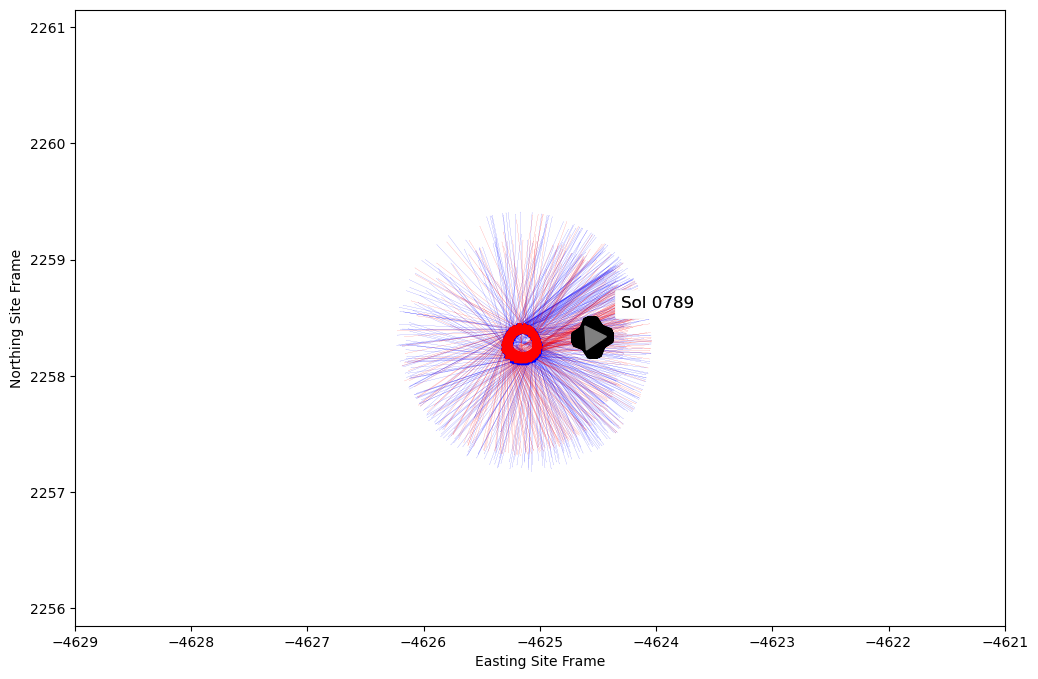

In [18]:
%%time

# time.sleep(1000)

%run MPPP.py

# image_list_process( IMG_paths[::-1], directory_output, suf, find_offsets_mode = 1 )
image_list_process( IMG_paths[:], directory_output, suf, find_offsets_mode = 0 )

In [22]:
IMG_paths[-1]

'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG'

In [96]:
%run MPPP.py

# im = image( 'C:/Users/cdt59/Desktop/heli/data//HSF_0174_0682390593_685RAD_N0120001HELI00005_000085J02.IMG' ) # (70,40,2)
im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG', ) # (140,0,0)
# im = image( 'C:/Users/cdt59/Downloads/demo_Mars_2020_sol_681/demo_Mars_2020_sol_681/data/NRF_0681_0727406356_133RZS_N0321038NCAM12681_0A0195J01.IMG' )
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703534_098RAD_N0390926ZCAM08811_1100LMA01.IMG' ) 
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG' ) 
# im = image( IMG_paths[0]. )

im.image_reference()


im.f, im.b1, im.b2, im.cxp, im.cyp, im.k1, im.k2, im.theta_degrees, im.filename

(275.50336626574546,
 -0.14341427097264159,
 1.6860934191188369e-14,
 7.2050353729077301,
 9.6560820635000084,
 0.0010660000000000001,
 -0.00039800000000000002,
 -90.0,
 'HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG')

In [97]:
im.A

array([ 0.00256683, -0.0580188 ,  0.998312  ])

In [81]:

im.projection = 'frame'
cmod_xml = "<?xml version=\"1.0\" encoding=\"UTF-8\"?><calibration>\n  <projection>{}</projection>\n  <width>{}</width>\n  <height>{}</height>\n  <f>{}</f>\n  <cx>{}</cx>\n  <cy>{}</cy>\n  <k1>{}</k1>\n  <k2>{}</k2>\n  <b1>{}</b1>\n  <b2>{}</b2>\n</calibration>"\
            .format( im.projection, im.w, im.h, im.f, im.cxp, im.cyp, im.k1, im.k2, im.b1, im.b2 )

print(cmod_xml)

cmod_save_path = 'C:/Users/cdt59/Documents/MPPP_workspace/cmods/M2020_ZR0_034mm.xml'
with open(cmod_save_path, "w") as text_file:
    text_file.write( cmod_xml )

<?xml version="1.0" encoding="UTF-8"?><calibration>
  <projection>frame</projection>
  <width>1648</width>
  <height>1200</height>
  <f>4700.754501939136</f>
  <cx>-88.98545385</cx>
  <cy>46.10949642679975</cy>
  <k1>-0.470639</k1>
  <k2>0.528572</k2>
  <b1>-5.473207924448616</b1>
  <b2>9.058190362634296</b2>
</calibration>


In [174]:
w,h = [640,480]

# fisheye
im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG', ) # (140,0,0)
Xp,Yp,Zp,yp,pp,rp = [-482.863524,-649.370648,10.150207,162.253878,-5.142142,-9.563955]

# im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390575_302RAD_N0120001HELI02756_0000LUJ02.IMG', ) # (140,0,0)
# Xp,Yp,Zp,yp,pp,rp = [-479.242935,-648.062762,10.033978,161.940305,-9.974779,-10.268652] 

f, cxp, cyp, k1, k2, b1, b2 = [275.5,2.2541485333336087,11.026877077021922,-0.0086719433263928569,0.0031444070599917777,0,0]


In [176]:
im.image_reference()

ypr = np.array([yp,pp,rp])
R_site2cam = find_R_from_ypr( ypr )
# R_cam2ned  = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )

R_cam2site = R_cam2ned.inv() * R_site2cam #R_veh2cam * R_veh2site.inv()

C = [ Yp, Xp, -Zp ]

cx = cxp+w/2
cy = cyp+h/2

K_cam = np.array([
            [ f+b1, b2, cx ],
            [    0,  f, cy ],
            [    0,  0,b 1 ], ])

HVA = np.matmul( K_cam, R_cam2site.as_matrix() )
H = HVA[0,:]
V = HVA[1,:]
A = HVA[2,:]
O = A
Ra = np.array([0,k1,k2])
E = np.array([0.0,0.0,0.0])

hp = ( H - cx* A ) / f
vp = ( V - cy* A ) / f

GEOMETRIC_CAMERA_MODEL = im.label['GEOMETRIC_CAMERA_MODEL']
GEOMETRIC_CAMERA_MODEL['REFERENCE_COORD_SYSTEM_NAME']  = 'SITE_FRAME'
GEOMETRIC_CAMERA_MODEL['REFERENCE_COORD_SYSTEM_INDEX'] = '3'

GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_1'] = list( C )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_2'] = list( A )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_3'] = list( H )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_4'] = list( V )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_5'] = list( O )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_6'] = list( Ra )
GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_Y'] = list( E )

print( im.filename)

text = [im.filename, C[0], C[1], C[2], A[0], A[1], A[2],  H[0], H[1], H[2], V[0], V[1], V[2], O[0], O[1], O[2], Ra[0], Ra[1], Ra[2], E[0], E[1], E[2], ]

np.savetxt( im.filename[:-4]+'.cmod', text[:], delimiter=',', fmt='%s ' )

HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG


In [177]:
GEOMETRIC_CAMERA_MODEL

PVLGroup([
  ('CALIBRATION_SOURCE_ID', 'SYNTHETIC')
  ('MODEL_TYPE', 'CAHVORE')
  ('MODEL_COMPONENT_ID', ['C', 'A', 'H', 'V', 'O', 'R', 'E'])
  ('MODEL_COMPONENT_NAME',
   ['CENTER', 'AXIS', 'HORIZONTAL', 'VERTICAL', 'OPTICAL', 'RADIAL', 'ENTRANCE'])
  ('MODEL_COMPONENT_UNIT',
   ['METER', 'N/A', 'PIXEL', 'PIXEL', 'N/A', 'N/A', 'N/A'])
  ('MODEL_COMPONENT_1', [-649.370648, -482.863524, -10.150207])
  ('MODEL_COMPONENT_2',
   [0.033533630991549102, -0.18518103963683868, 0.98213210829884889])
  ('MODEL_COMPONENT_3',
   [-75.906206915999221, -317.16858979776362, 270.90647767129389])
  ('MODEL_COMPONENT_4',
   [269.75255526958802, -130.11981896074033, 221.84935125934959])
  ('MODEL_COMPONENT_5',
   [0.033533630991549102, -0.18518103963683868, 0.98213210829884889])
  ('MODEL_COMPONENT_6', [0.0, -0.0086719433263928569, 0.0031444070599917777])
  ('MODEL_COMPONENT_7', [0.0, 0.0, 0.0])
  ('MODEL_COMPONENT_8', 3.0)
  ('MODEL_COMPONENT_9', 0.0)
  ('MODEL_TRANSFORM_VECTOR', [0.0, 0.0, -0.26575])
 

In [343]:
%run MPPP.py

def find_quat_cam( image_name ):
    
    im = image( image_name ) 

    cahvor = np.array( [im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_1'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_2'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_3'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_4'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_5'],
                        im.label['GEOMETRIC_CAMERA_MODEL']['MODEL_COMPONENT_6'],
                      ], dtype=np.float64 )

    hs    = norm( np.cross( cahvor[2], cahvor[1]) )
    vs    = norm( np.cross( cahvor[3], cahvor[1]) )
    hc    = np.dot( cahvor[2], cahvor[1] ) 
    vc    = np.dot( cahvor[3], cahvor[1] ) 

    hp    = ( cahvor[2] - hc* cahvor[1] ) / hs
    vp    = ( cahvor[3] - vc* cahvor[1] ) / vs

    theta   = np.arcsin( ( -norm( np.cross( vp, hp ) )/norm( vp )/norm( hp )) )

    K_cahv  = np.array([
                [ -hs*np.sin(theta), hs*np.cos(theta), hc ],
                [  0,                vs              , vc ],
                [  0,                0               ,  1 ], ])
    Ki_cahv = inv( K_cahv )

    R_cahv  = np.matmul( Ki_cahv, np.array( [ cahvor[2], cahvor[3], cahvor[1] ] ) )
    Ri_cahv = inv( R_cahv )

    cxp, cyp = [ hc-640/2, vc-480/2 ]

    k1 = cahvor[5][1]*1
    k2 = cahvor[5][2]*1

    # hs, vs, cxp, cyp, k1, k2,

    q_cam = R.from_matrix( R_cahv )

    return q_cam

directory_input  = 'C:/Users/cdt59/Downloads/demo_Mars_2020_sol_681/demo_Mars_2020_sol_681/data'

IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +'*_N*'+'*.IMG' ) )


q_cams = []
q_rots = []


q_ned2enu = R.from_matrix( [[0,1,0],[1,0,0],[0,0,-1]] )


      
for i in range(len(IMG_paths))[::4]:
    
    q_cam = find_quat_cam( IMG_paths [i]) 
    q_cams.append( q_cam )
    
    im = image(  IMG_paths [i] )
    
    q = im.label['ROVER_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION']
    q = [ q[1], q[2], q[3], q[0]]
    q_veh = R.from_quat( q )

    
    print( np.round(( q_cam * q_ned2enu * q_veh ).as_euler('zyx',degrees=1)), np.round(rots[i]) )
    


[-170.    1.  120.] [ 190.   60.    0.]
[ 119.    1.  121.] [ 118.   60.    0.]
[ -98.    0.  119.] [ 262.   60.    0.]
[ -56.   -0.  101.] [ 304.   79.    0.]
[ 150.    0.  103.] [ 150.   77.    0.]


In [492]:
%run MPPP.py

def cahvor2photogrammetry_Di_Li_2004( GEOMETRIC_CAMERA_MODEL ):
    
    # find_quat_cam( im.label['GEOMETRIC_CAMERA_MODEL'] )

    def cmod_from_cahvor( self, GEOMETRIC_CAMERA_MODEL ):

            
        self.C  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_1'], dtype=np.float64 )
        self.A  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_2'], dtype=np.float64 )
        self.H  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_3'], dtype=np.float64 )
        self.V  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_4'], dtype=np.float64 )
        self.O  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_5'], dtype=np.float64 )
        self.R  = np.array(  GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_6'], dtype=np.float64 )

        self.hs = norm( np.cross( self.H, self.A ) )
        self.vs = norm( np.cross( self.V, self.A ) )
        self.hc = np.dot( self.H, self.A ) 
        self.vc = np.dot( self.V, self.A ) 

        self.hp = ( self.H - self.hc* self.A ) / self.hs
        self.vp = ( self.V - self.vc* self.A ) / self.vs

        self.theta = np.arcsin( ( - norm( np.cross( self.vp, self.hp ) )
                                  / norm( self.vp )
                                  / norm( self.hp ) ) )

        self.K_cam = np.array([
                    [ -self.hs*np.sin(self.theta), self.hs*np.cos(self.theta), self.hc ],
                    [                           0,                    self.vs, self.vc ],
                    [                           0,                          0,       1 ], ])

        self.rot_cam = np.matmul( np.inv( self.K_cam ), 
                                  np.array( [ self.H, self.V, self.A ] ) )

        self.R_cam = R.from_matrix( self.rot_cam )

        self.k1 = self.R[1]
        self.k2 = self.R[2]
        self.k3 = 0

        self.p1 = 0
        self.p2 = 0



directory_input  = 'C:/Users/cdt59/Downloads/demo_Mars_2020_sol_681/demo_Mars_2020_sol_681/data'

IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +'*_N*'+'*.IMG' ) )


R_cams = []
R_rots = []


R_ned2enu = R.from_matrix( [[0,1,0],[1,0,0],[0,0,-1]] )

R_cam2ned = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )


      
for i in range(len(IMG_paths))[::3]:
    
    R_cam = find_quat_cam( IMG_paths [i]) 
    R_cams.append( R_cam )
    
    im = image(  IMG_paths [i] )
    
    q = im.label['ROVER_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION']
    q = [ q[1], q[2], q[3], q[0]]
    R_veh = R.from_quat( q )
    print( )
    
    print( 
#         np.round(( R_cam * R_ned2enu * R_veh ).as_euler('zxy',degrees=1),1), 
        np.round(( R_cam * R_veh.inv() * R_cam2ned ).as_euler('zxy',degrees=1),1), 
#         np.round(( q_ned2enu * q_cam * q_veh ).as_euler('zyx',degrees=1),1), 
#         np.round(( q_veh * q_cam2enu * q_cam ).as_euler('zyx',degrees=1),1), 
        np.round(rots[i],1),
        np.round(rots_est[i],1),
        np.round( cam_veh_2_ypr( R_cam, R_veh),1),'',np.round(np.array(rots_est[i])-np.array(cam_veh_2_ypr( R_cam, R_veh)),1)
    )


def cam_veh_2_ypr( R_cam, R_veh ):
    
    R_cam2ned = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )    
    angles = ( R_cam * R_veh.inv() * R_cam2ned ).as_euler( 'zxy',degrees=1 )    
    return np.array([ ( - angles[0] ) % 360, - angles[1], angles[2] ])

def ypr_veh_2_cam( ypr, R_veh ):
    
    R_cam2ned = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] ) 
    angles = [ -ypr[0], -ypr[1], ypr[2] ]
    return R.from_euler( 'zxy', angles, degrees=1 ) * R_cam2ned.inv() * R_veh
    
ypr = cam_veh_2_ypr( R_cam, R_veh )
R_camp = ypr_veh_2_cam( ypr, R_veh )

R_cam.as_rotvec(degrees=1) - R_camp.as_rotvec(degrees=1)


[ 170.6  -59.4   -0.9] [ 189.6   59.9    0. ] [ 189.4   59.4   -0.7] [ 189.4   59.4   -0.9]  [ 0.  -0.1  0.2]

[-48.  -59.2   1. ] [ 46.   59.7   0. ] [ 48.   59.2   1.2] [ 48.   59.2   1. ]  [-0.  -0.1  0.2]

[-17.1 -78.5   0.9] [ 15.4  78.9   0. ] [ 17.   78.4   1. ] [ 17.1  78.5   0.9]  [-0.1 -0.1  0. ]

[ 26.5 -59.6  -0.9] [ 334.2   60.2    0. ] [ 333.5   59.6   -0.9] [ 333.5   59.6   -0.9]  [-0.  -0.   0.1]

[ 60.1 -78.5  -4. ] [ 303.6   79.1    0. ] [ 299.7   78.5   -4. ] [ 299.9   78.5   -4. ]  [-0.1 -0.  -0. ]

[-167.   -77.4   -2.7] [ 169.2   77.     0. ] [ 167.2   76.8   -2.4] [ 167.    77.4   -2.7]  [ 0.2 -0.6  0.3]


In [487]:
ypr, R.from_euler( 'zxy', ypr, degrees=1 ).as_euler( 'zxy',degrees=1 )  

([166.97457010692773, 77.441774296512975, -2.7128127945315361],
 array([ 166.97457011,   77.4417743 ,   -2.71281279]))

In [ ]:
[-170.    0.  121.] [ 190.   60.    0.]
[ 119.   -1.  121.] [ 118.   60.    0.]
[ -98.    1.  120.] [ 262.   60.    0.]
[ -56.    1.  101.] [ 304.   79.    0.]
[ 150.   -1.  104.] [ 150.   77.    0.]

In [444]:
rots= [
[189.65,	59.9,0],
[261.82	,60.02,0],
[333.83	,59.98,0],
[46.01,	59.7,0],
[117.64	,59.89,0],
[303.26	,78.92,0],
[15.43	,78.94,0],
[189.99	,60.11,0],
[262.16	,60.23,0],
[334.17	,60.19,0],
[46.36,	59.9,0],
[117.99	,60.09,0],
[303.57	,79.13,0],
[15.74	,79.15,0],
[152.85	,77.01,0],
[169.15	,76.95,0],
[150.46,	77.2,0],
[166.76	,77.13,0],
]
rots_est = [
[189.400513,	59.371518,	-0.703836],
[259.998017,	59.463940,	-2.077667],
[333.388496,	59.439321,	-0.894630],
[47.9583730,	59.155555,	1.1738150],
[119.693799,	59.365431,	1.3010680],
[299.389114,	78.357353,	-4.312049],
[16.9638570,	78.401259,	0.9805770],
[189.500359,	59.508122,	-0.685157],
[260.111964,	59.605751,	-2.043629],
[333.500606,	59.584617,	-0.864718],
[48.1147770,	59.305393,	1.2359390],
[119.832181,	59.510558,	1.3295250],
[299.744111,	78.496317,	-4.027788],
[17.2673580,	78.556619,	1.2369350],
[152.151878,	76.897309,	-1.216484],
[167.174854,	76.820812,	-2.439517],
[154.744418,	76.699157,	3.9788250],
[169.772341,	76.635643,	2.7573490],
]

rots_est_ = [
[189.575103,	59.341445,	-0.568371],
[260.208519,	59.31446 ,	-1.931865],
[333.291376,	59.252065,	-1.078526],
[47.798095 ,	59.082518,	0.926741 ],
[119.698948,	59.358233,	1.253662 ],
[299.778112,	78.131351,	-3.963961],
[16.093391 ,	78.221552,	0.042631 ],
[189.62579 ,	60.177921,	-0.607367],
[260.36672 ,	60.153744,	-1.854743],
[333.464651,	60.101101,	-0.964275],
[48.1625   ,	59.943258,	1.200726 ],
[119.718057	,60.20794  ,	1.15542  ],
[300.003766,	79.016264,	-3.864333],
[16.687099 ,	79.180346,	0.595529 ],
[152.192651,	76.838055,	-1.027022],
[167.128715,	76.763846,	-2.326082],
[154.779602,	76.644959,	3.985994 ],
[169.720814,	76.584551,	2.688564 ],]


qts = [ qs[i] * R.from_euler('zyx',rots[i],degrees=1).inv() for i in range(len(IMG_paths)) ]

for i in range(len(IMG_paths)):
    print( np.round(qts[i].as_rotvec(degrees=1)))

[-19. -19.  74.]
[-88. -89. -45.]
[  31.   29.  108.]
[-59. -60.  20.]
[  88.   88.  116.]
[ 82.  81.  83.]
[-30. -32.  78.]
[-20. -19.  74.]
[-89. -89. -45.]
[  31.   29.  108.]
[-60. -61.  20.]
[  88.   88.  116.]
[ 82.  81.  82.]
[-30. -32.  78.]
[ 33.  36.  95.]
[  8.  10.  93.]
[ 40.  39.  94.]
[ 14.  14.  93.]


In [265]:
q_cam = R.from_matrix( R_cahv )

# q_cahv = R.from_matrix( [[1,0,0],[0,1,0],[0,0,1]] )



# q_cam2rpy = R.from_matrix( [[-1,0,0],[0,-1,0],[0,0,1]] )
q_cam2rpy = R.from_matrix( [[0,0,1],[1,0,0],[0,1,0]] )




# q = im.label['HELI_M_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION'].copy()
# im.q_M = R.from_quat( [ q[1], q[2], q[3], q[0]] )

# q = im.label['HELI_G_COORDINATE_SYSTEM']['ORIGIN_ROTATION_QUATERNION'].copy()
# im.q_G = R.from_quat( [ q[1], q[2], q[3], q[0]] )


# im.q_T = q_cam * im.q_G * im.q_M  * q_cam2enu *  q_ned2enu


im.q_T = q_cam * q_cam2rpy.inv()


im.ypr = im.q_T.as_euler('zyx', degrees=True)

im.ypr

array([ 78.15561375, -46.91299754,  90.21532491])

In [263]:
aim = R.from_euler('zyx', (303,80,-4), degrees=True)

q = q_cam * aim.inv()
q.as_rotvec(degrees=1), q.as_matrix()

(array([ 85.46743662,  84.50928645,  79.2275697 ]),
 array([[-0.17108118,  0.30651506,  0.93636518],
        [ 0.95417273, -0.1852945 ,  0.2349901 ],
        [ 0.24553132,  0.9336565 , -0.26076791]]))

In [16]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

NameError: name 'rmcs' is not defined

In [186]:
q_T_aim = R.from_euler( 'zyx', (70,38,4),degrees=True )

q_cam2enu = q_T_aim.inv() *q_cam * im.q_G * im.q_M *q_ned2enu

q_cam2enu.as_rotvec(degrees=1)

array([ -13.95403568, -122.26286237,   67.64833285])

In [3]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           ''+'\t',''+'\t',''+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )

821 	 40 	 132 	 	 	 	 -4649.131 	 2273.826 	 149.121 	
821 	 40 	 70 	 	 	 	 -4644.041 	 2275.221 	 148.731 	
818 	 40 	 0 	 	 	 	 -4649.281 	 2276.728 	 148.901 	
818 	 39 	 1550 	 	 	 	 -4648.226 	 2283.74 	 148.704 	
816 	 39 	 1418 	 	 	 	 -4629.225 	 2300.703 	 147.718 	
816 	 39 	 1294 	 	 	 	 -4625.095 	 2277.624 	 147.133 	
797 	 39 	 1170 	 	 	 	 -4625.436 	 2254.732 	 148.838 	
795 	 39 	 1112 	 	 	 	 -4623.796 	 2253.281 	 148.705 	
793 	 39 	 1036 	 	 	 	 -4622.209 	 2248.958 	 148.201 	
784 	 39 	 926 	 	 	 	 -4624.55 	 2258.333 	 148.341 	
784 	 39 	 858 	 	 	 	 -4621.025 	 2262.479 	 147.291 	
775 	 39 	 690 	 	 	 	 -4603.626 	 2269.34 	 146.063 	
770 	 39 	 650 	 	 	 	 -4603.363 	 2270.358 	 146.078 	
768 	 39 	 0 	 	 	 	 -4598.009 	 2171.894 	 148.587 	
766 	 38 	 2208 	 	 	 	 -4588.678 	 2090.374 	 150.016 	
766 	 38 	 2102 	 	 	 	 -4589.52 	 2088.131 	 149.977 	
765 	 38 	 1808 	 	 	 	 -4575.314 	 2041.085 	 149.421 	
764 	 38 	 944 	 	 	 	 -4473.221 	 1919.66 	 149

In [29]:
data['features'][-1]

{'type': 'Feature',
 'properties': {'RMC': '40_132',
  'site': 40,
  'drive': 132,
  'sol': 821,
  'easting': 4349844.955,
  'northing': 1095573.521,
  'elev_geoid': -2420.788818,
  'elev_radii': -4108.919434,
  'radius': 3392081.08,
  'lon': 77.36819431,
  'lat': 18.48298797,
  'roll': 8.657,
  'pitch': 4.009,
  'yaw': -106.695,
  'yaw_rad': -1.8622,
  'tilt': 9.534,
  'dist_m': 10.97,
  'dist_total_m': 18718.678,
  'dist_km': 18.72,
  'dist_mi': 11.63,
  'final': 'y',
  'Note': 'Used Mobility Report WID 48211',
  'images': [{'name': 'Panorama',
    'isPanoramic': True,
    'url': 'Layers/mosaics/N_LRGB_0821_RZS_0400132_CYL_L_AUTOGENJ01.jpg',
    'rows': '2247',
    'columns': '9292',
    'azmin': '0',
    'azmax': '360',
    'elmin': '-69.3863',
    'elmax': '17.6854',
    'elzero': '457.492'}]},
 'geometry': {'type': 'Point',
  'coordinates': [77.36819431, 18.48298797, -2420.788818]}}